<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/School_Work_4_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sb


In [2]:
dataset = pd.read_csv("/content/sample_data/BankNoteAuthenticity-1.csv")

In [3]:
dataset

,VarianceOfWavelet,SkewnessOfWavelet,KurtosisOfWavelet,EntropyOfImage,Authenticity,Auth
0,3.62160,8.66610,-2.8073,-0.44699,0,Yes
1,4.54590,8.16740,-2.4586,-1.46210,0,Yes
2,3.86600,-2.63830,1.9242,0.10645,0,Yes
3,3.45660,9.52280,-4.0112,-3.59440,0,Yes
4,0.32924,-4.45520,4.5718,-0.98880,0,Yes
...,...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1,No
1368,-1.38870,-4.87730,6.4774,0.34179,1,No
1369,-3.75030,-13.45860,17.5932,-2.77710,1,No
1370,-3.56370,-8.38270,12.3930,-1.28230,1,No


In [8]:
dataset['Auth1'] = dataset.loc[:,'Auth']

In [9]:
dataset['Auth'] = dataset['Auth'].replace(('Yes','No'),(1,0))

<ipython-input-9-d3b737f29eb6>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Auth'] = dataset['Auth'].replace(('Yes','No'),(1,0))


In [10]:
dataset

,VarianceOfWavelet,SkewnessOfWavelet,KurtosisOfWavelet,EntropyOfImage,Authenticity,Auth,Auth1
0,3.62160,8.66610,-2.8073,-0.44699,0,1,Yes
1,4.54590,8.16740,-2.4586,-1.46210,0,1,Yes
2,3.86600,-2.63830,1.9242,0.10645,0,1,Yes
3,3.45660,9.52280,-4.0112,-3.59440,0,1,Yes
4,0.32924,-4.45520,4.5718,-0.98880,0,1,Yes
...,...,...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1,0,No
1368,-1.38870,-4.87730,6.4774,0.34179,1,0,No
1369,-3.75030,-13.45860,17.5932,-2.77710,1,0,No
1370,-3.56370,-8.38270,12.3930,-1.28230,1,0,No


In [11]:
X = dataset.iloc[:, :4]
Y = dataset.iloc[:, 5]

In [12]:
X

,VarianceOfWavelet,SkewnessOfWavelet,KurtosisOfWavelet,EntropyOfImage
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [13]:
Y

,Auth
0,1
1,1
2,1
3,1
4,1
...,...
1367,0
1368,0
1369,0
1370,0


In [14]:
dataset.head()

,VarianceOfWavelet,SkewnessOfWavelet,KurtosisOfWavelet,EntropyOfImage,Authenticity,Auth,Auth1
0,3.62160,8.6661,-2.8073,-0.44699,0,1,Yes
1,4.54590,8.1674,-2.4586,-1.46210,0,1,Yes
2,3.86600,-2.6383,1.9242,0.10645,0,1,Yes
3,3.45660,9.5228,-4.0112,-3.59440,0,1,Yes
4,0.32924,-4.4552,4.5718,-0.98880,0,1,Yes


In [15]:
df = pd.DataFrame(dataset)

In [16]:
print(df)

      VarianceOfWavelet  SkewnessOfWavelet  KurtosisOfWavelet  EntropyOfImage  \
0               3.62160            8.66610            -2.8073        -0.44699   
1               4.54590            8.16740            -2.4586        -1.46210   
2               3.86600           -2.63830             1.9242         0.10645   
3               3.45660            9.52280            -4.0112        -3.59440   
4               0.32924           -4.45520             4.5718        -0.98880   
...                 ...                ...                ...             ...   
1367            0.40614            1.34920            -1.4501        -0.55949   
1368           -1.38870           -4.87730             6.4774         0.34179   
1369           -3.75030          -13.45860            17.5932        -2.77710   
1370           -3.56370           -8.38270            12.3930        -1.28230   
1371           -2.54190           -0.65804             2.6842         1.19520   

      Authenticity  Auth Au

In [17]:
X = dataset.iloc[:, :4]
Y = dataset.iloc[:,5]
Y

,Auth
0,1
1,1
2,1
3,1
4,1
...,...
1367,0
1368,0
1369,0
1370,0


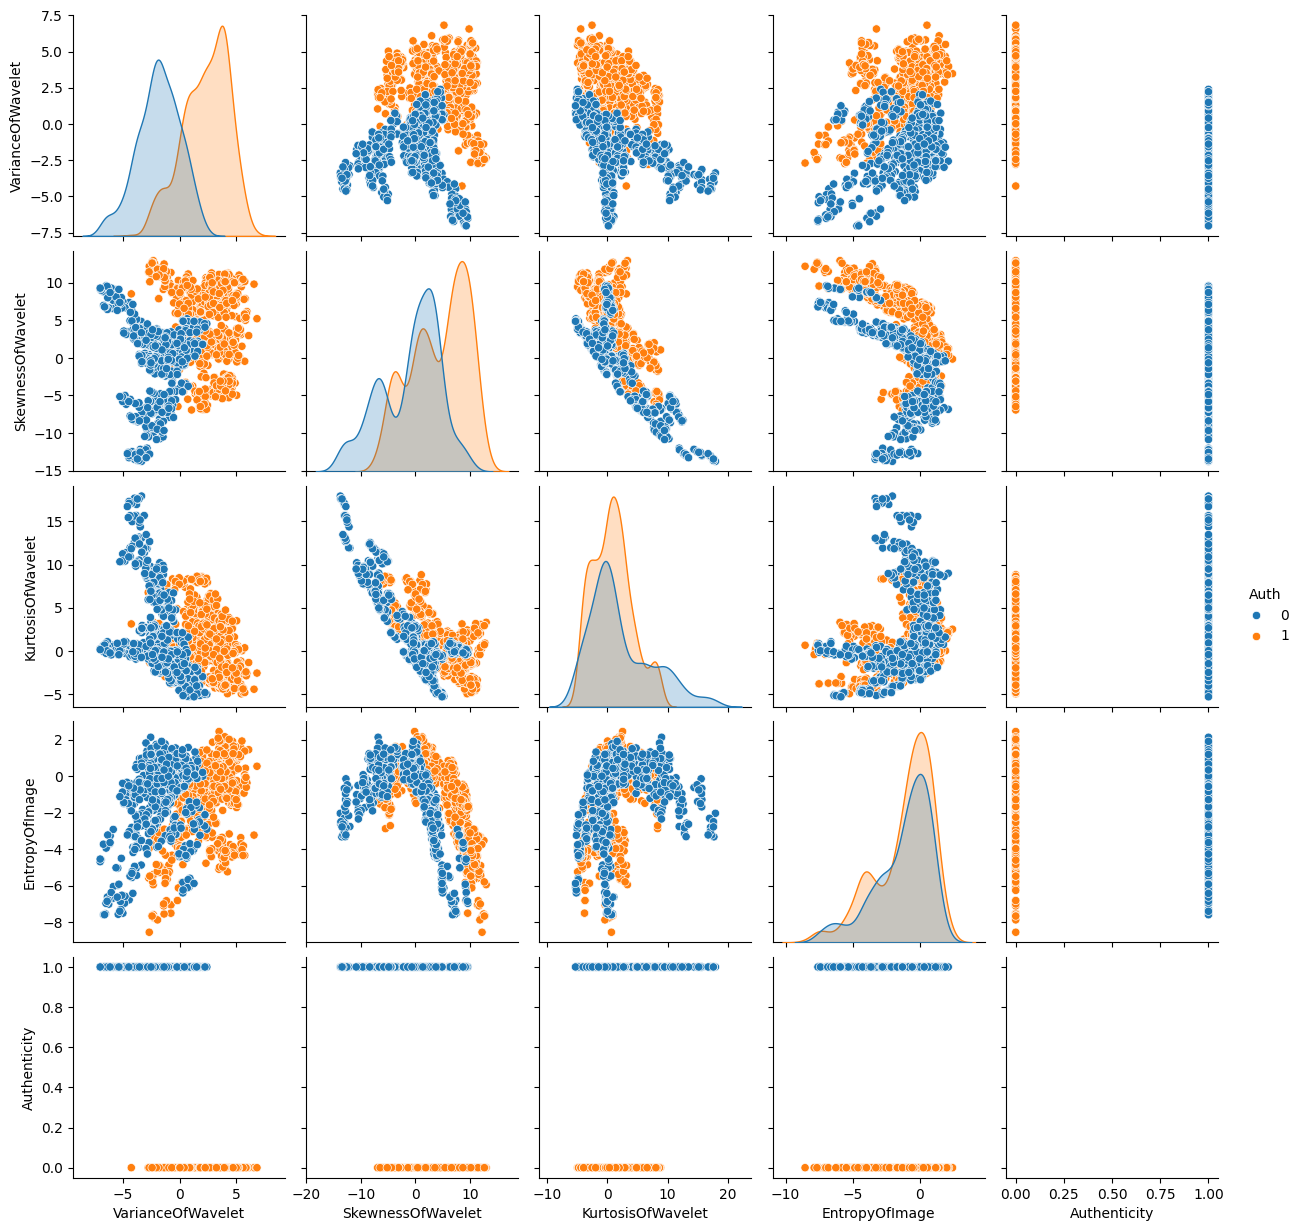

In [18]:
sb.pairplot(dataset, hue='Auth')

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [42]:
#From sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression()
#classifier.fit(X_train, y_train)

from sklearn import svm
classifier = svm.SVC()
classifier.fit(X_train, y_train)

SVC()

In [43]:
predictions = classifier.predict(X_test)
predictions

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       157

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

[[118   0]
 [  0 157]]


In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

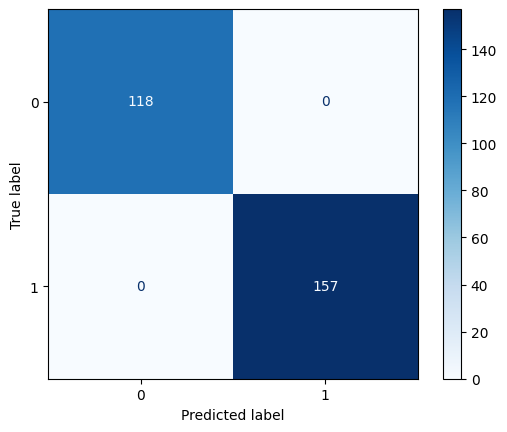

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming 'prediction' from previous cells holds the predicted values
y_pred = predictions  # Assign the predictions to y_pred

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.show()

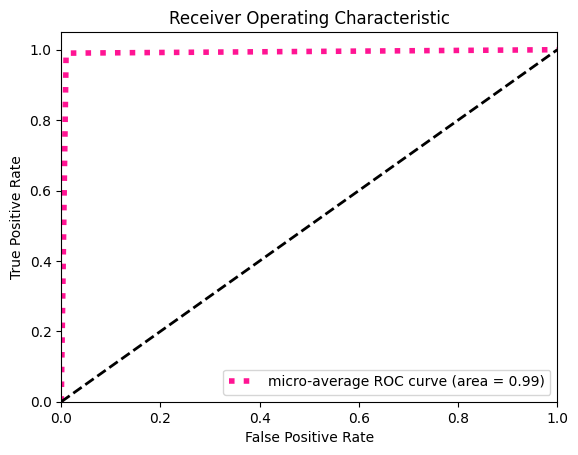

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

#----------------------------------------------------Compute ROC curve and AUC--------------------------------------------------
# Assuming y_test and y_pred are multiclass
n_classes = len(np.unique(y_test))  # Get the number of unique classes

# Binarize the output for multiclass ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_test))

# Check if it's a binary classification problem
if n_classes == 2:
    # If binary, adjust the arrays to have 2 columns
    y_test_bin = np.hstack((1 - y_test_bin, y_test_bin))
    y_pred_bin = np.hstack((1 - y_pred_bin, y_pred_bin))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class or micro-average
plt.figure()
# Example: Plotting micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# You can add plots for individual classes as needed
# ...

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

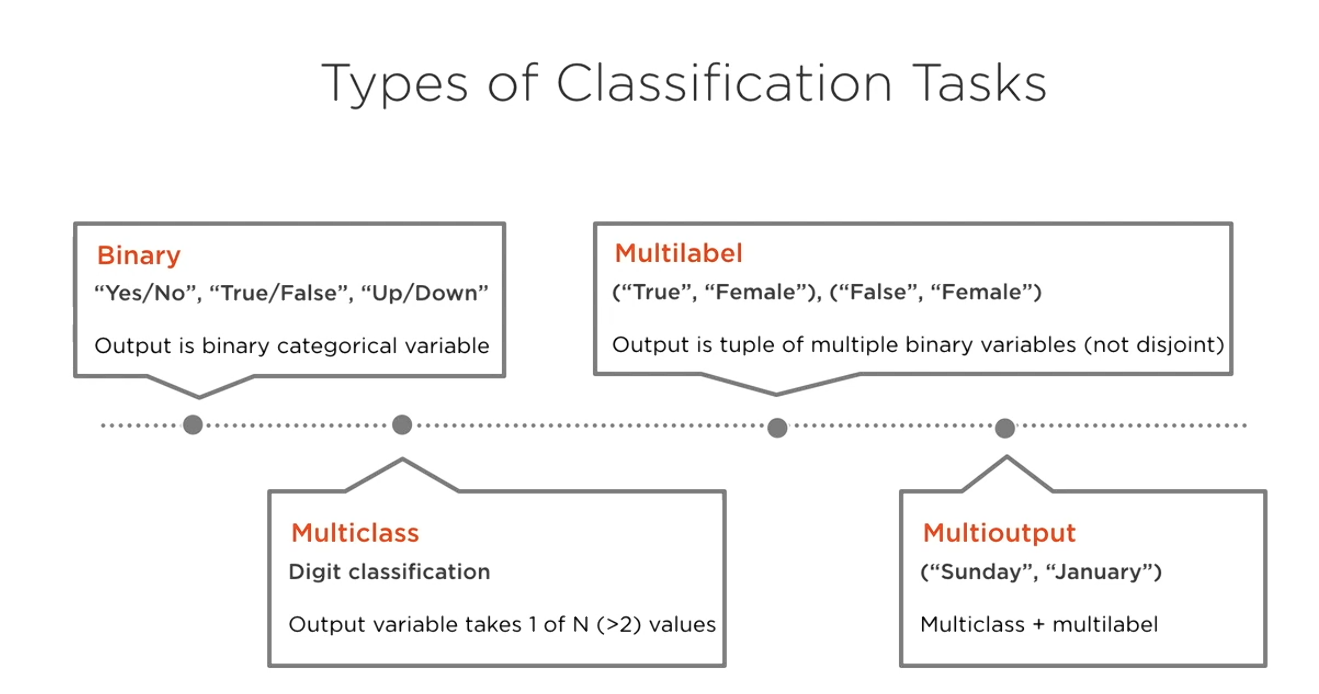

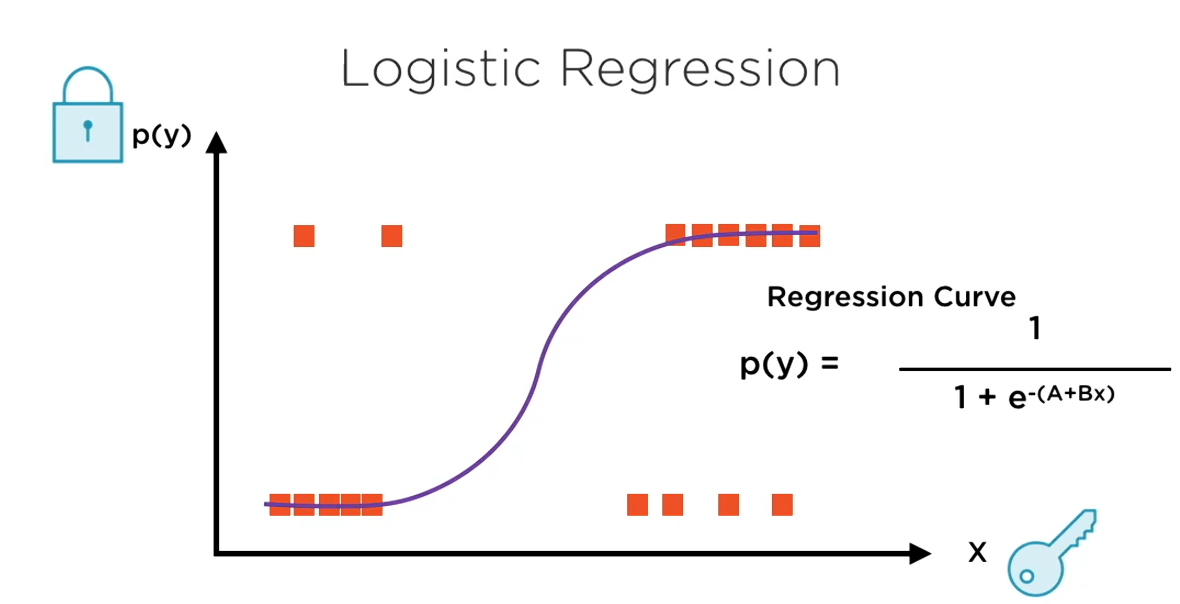

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
gen = pd.read_csv("/content/sample_data/gender_voice_dataset.csv")

In [ ]:
gen.sample(10)

In [ ]:
gen.shape

In [ ]:
gen.describe()

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
gen['label'] = labelEncoder.fit_transform(gen['label'].astype(str))


In [ ]:
gen.head()

In [ ]:
gen.boxplot(by = 'label', column = ['meanfreq'], grid = False, figsize = (10,5))

In [ ]:
from sklearn.model_selection import train_test_split
X = gen.drop('label', axis=1)
y = gen['label']
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape , y_train.shape

In [ ]:
X_test.shape , y_test.shape

In [ ]:
from sklearn.linear_model import LogisticRegression

# Changed 'penalty' to 'l2' which is a valid option.
logistic_model = LogisticRegression(penalty='l2', solver='liblinear') # used under the hood
logistic_model.fit(X_train, y_train)

In [ ]:
y_pred = logistic_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}") # this is the number voices accuratly classified as male or female
print(f"Precision: {precision:.2f}") # of all voices These are the possitive identification correctly
print(f"Recall: {recall:.2f}") # off all male voices  how many were  classified correctly  as male

##Support Vector Machine

In [ ]:
import pandas as pd

In [ ]:
datatt = pd.read_csv("/content/sample_data/german_credit_data_dataset.csv")

In [ ]:
datatt

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,personal,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
0,A11,6,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1,A192,A201,1
1,A12,48,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1,A191,A201,2
2,A14,12,A34,A46,2096.0,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1.0,A172,2,A191,A201,1
3,A11,42,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2,A191,A201,1
4,A11,24,A33,A40,4870.0,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2.0,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736.0,A61,A74,3.0,A92,A101,...,A121,31.0,A143,A152,1.0,A172,1,A191,A201,1
996,A11,30,A32,A41,3857.0,A61,A73,4.0,A91,A101,...,A122,40.0,A143,A152,1.0,A174,1,A192,A201,1
997,A14,12,A32,A43,804.0,A61,A75,4.0,A93,A101,...,A123,38.0,A143,A152,1.0,A173,1,A191,A201,1
998,A11,45,A32,A43,1845.0,A61,A73,4.0,A93,A101,...,A124,23.0,A143,A153,1.0,A173,1,A192,A201,2


In [ ]:
datatt.shape

(1000, 21)

In [ ]:
datatt.columns

Index(['checking_account_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings', 'present_employment', 'installment_rate',
       'personal', 'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'existing_credits', 'job',
       'dependents', 'telephone', 'foreign_worker', 'customer_type'],
      dtype='object')

In [ ]:
datatt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   checking_account_status  1000 non-null   object 
 1   duration                 1000 non-null   int64  
 2   credit_history           1000 non-null   object 
 3   purpose                  1000 non-null   object 
 4   credit_amount            1000 non-null   float64
 5   savings                  1000 non-null   object 
 6   present_employment       1000 non-null   object 
 7   installment_rate         1000 non-null   float64
 8   personal                 1000 non-null   object 
 9   other_debtors            1000 non-null   object 
 10  present_residence        1000 non-null   float64
 11  property                 1000 non-null   object 
 12  age                      1000 non-null   float64
 13  other_installment_plans  1000 non-null   object 
 14  housing                  

In [ ]:
datatt.index

RangeIndex(start=0, stop=1000, step=1)

In [ ]:
datatt.describe()

,duration,credit_amount,installment_rate,present_residence,age,existing_credits,dependents,customer_type
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [ ]:
!pip install seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the dictionary 'data' into a Pandas DataFrame
datatt = pd.DataFrame(datatt)  # Assuming 'data' is your dictionary

# Select only numeric columns for correlation calculation
numeric_data = datatt.select_dtypes(include=['number'])

# Now you can calculate the correlation matrix
correlation = numeric_data.corr()
correlation

,duration,credit_amount,installment_rate,present_residence,age,existing_credits,dependents,customer_type
duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.214927
credit_amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.154739
installment_rate,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.072404
present_residence,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.002967
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.091127
existing_credits,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.045732
dependents,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.003015
customer_type,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,1.000000


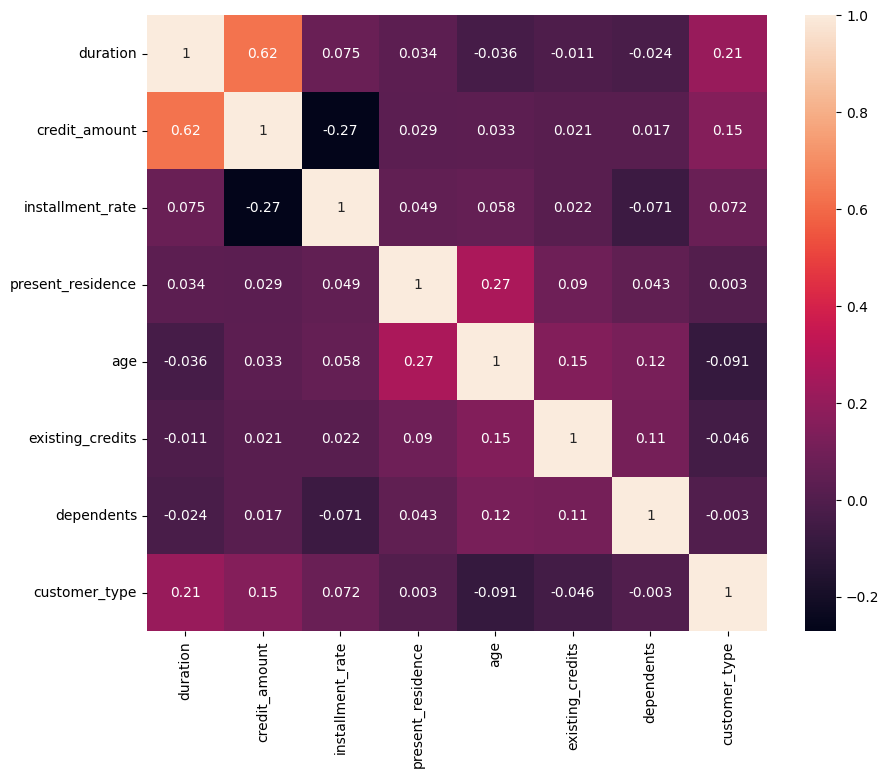

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(10, 8))
sns.heatmap(correlation, annot=True)
plt.show()

In [ ]:
datatt = datatt.drop(['telephone', 'personal', 'present_residence', 'other_installment_plans'], axis=1)

In [ ]:
datatt['savings'].unique()

array(['A65', 'A61', 'A63', 'A64', 'A62'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
datatt['savings'] = le.fit_transform(datatt['savings'])
print(datatt.head())


  checking_account_status  duration credit_history purpose  credit_amount  \
0                     A11         6            A34     A43         1169.0   
1                     A12        48            A32     A43         5951.0   
2                     A14        12            A34     A46         2096.0   
3                     A11        42            A32     A42         7882.0   
4                     A11        24            A33     A40         4870.0   

   savings present_employment  installment_rate other_debtors property   age  \
0        4                A75               4.0          A101     A121  67.0   
1        0                A73               2.0          A101     A121  22.0   
2        0                A74               2.0          A101     A121  49.0   
3        0                A74               2.0          A103     A122  45.0   
4        0                A73               3.0          A101     A124  53.0   

  housing  existing_credits   job  dependents foreign_wo

In [ ]:
from sklearn.preprocessing import LabelEncoder

savings_dict = {"A65" : 0, "A61" : 1, "A62" : 2, "A63" : 3, "A64" : 4}
datatt['savings'].replace(savings_dict, inplace=True)
datatt.head()

<ipython-input-22-50833de982b8>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datatt['savings'].replace(savings_dict, inplace=True)


,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,other_debtors,property,age,housing,existing_credits,job,dependents,foreign_worker,customer_type
0,A11,6,A34,A43,1169.0,4,A75,4.0,A101,A121,67.0,A152,2.0,A173,1,A201,1
1,A12,48,A32,A43,5951.0,0,A73,2.0,A101,A121,22.0,A152,1.0,A173,1,A201,2
2,A14,12,A34,A46,2096.0,0,A74,2.0,A101,A121,49.0,A152,1.0,A172,2,A201,1
3,A11,42,A32,A42,7882.0,0,A74,2.0,A103,A122,45.0,A153,1.0,A173,2,A201,1
4,A11,24,A33,A40,4870.0,0,A73,3.0,A101,A124,53.0,A153,2.0,A173,2,A201,2


In [ ]:
# Create DataFrame
datatt = pd.DataFrame(datatt)

# One-hot encode specified columns
datatt = pd.get_dummies(
    datatt,
    columns=[
        'checking_account_status', 'credit_history', 'purpose', 'present_employment',
        'property', 'housing', 'other_debtors', 'job', 'foreign_worker'
    ]
)

# Display the transformed dataset
print(datatt.head())

   duration  credit_amount  savings  installment_rate   age  existing_credits  \
0         6         1169.0        4               4.0  67.0               2.0   
1        48         5951.0        0               2.0  22.0               1.0   
2        12         2096.0        0               2.0  49.0               1.0   
3        42         7882.0        0               2.0  45.0               1.0   
4        24         4870.0        0               3.0  53.0               2.0   

   dependents  customer_type  checking_account_status_A11  \
0           1              1                         True   
1           1              2                        False   
2           2              1                        False   
3           2              1                         True   
4           2              2                         True   

   checking_account_status_A12  ...  housing_A153  other_debtors_A101  \
0                        False  ...         False                True   


In [ ]:
datatt.shape

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
def naive_bayes(X_train, y_train, X_test):
    classifier = GaussianNB() # uses naive bayse for classification
    classifier.fit(X_train, y_train)

    return classifier

In [ ]:
def k_nearest_neighbors(X_train, y_train, X_test):
    classifier = KNeighborsClassifier(n_neighbors=10)
    classifier.fit(X_train, y_train)

    return classifier

In [ ]:
def svc(X_train, y_train, X_test):
    classifier = SVC(kernel='rbf', gamma='scale')
    classifier.fit(X_train, y_train)

    return classifier

In [ ]:
def decision_tree(X_train, y_train, X_test):
    classifier = DecisionTreeClassifier(max_depth=6)
    classifier.fit(X_train, y_train)

    return classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X = datatt.drop('customer_type', axis=1)
y = datatt['customer_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
def build_and_train_classifier(x_train, y_train, classfication_fn):

    model = classfication_fn(x_train, y_train)
    y_pred = model.predict(X_test)

    train_score = model.score(X_train, y_train)
    test_score = accuracy_score(y_test, y_pred)

    print("Training Score:", train_score)
    print("Testing Score:", test_score)
    accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_wine
import pandas as pd

# Example dataset (replace with your dataset if needed)
# Here, I will use the wine dataset from sklearn for demonstration purposes.
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to build and train a classifier
def build_and_train_classifier(x_train, y_train, x_test, y_test, classification_fn):
    """
    Train and evaluate a classification model.
    Arguments:
    - x_train: Training features
    - y_train: Training labels
    - x_test: Testing features
    - y_test: Testing labels
    - classification_fn: A classification model (e.g., Decision Tree, Naive Bayes)

    Returns:
    - None (prints the training and testing accuracy)
    """
    # Initialize the model (classification_fn should be a class like DecisionTreeClassifier or GaussianNB)
    model = classification_fn()

    # Train the model on training data
    model.fit(x_train, y_train)

    # Predict on training and test data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate accuracy
    train_score = accuracy_score(y_train, y_train_pred)
    test_score = accuracy_score(y_test, y_test_pred)

    # Print results
    print(f"Training Accuracy: {train_score:.4f}")
    print(f"Testing Accuracy: {test_score:.4f}")


# Train and evaluate with Decision Tree
print("Decision Tree Classifier:")
build_and_train_classifier(X_train, y_train, X_test, y_test, DecisionTreeClassifier)

# Train and evaluate with Gaussian Naive Bayes
print("\nGaussian Naive Bayes:")
build_and_train_classifier(X_train, y_train, X_test, y_test, GaussianNB)


print("\nNaive_bayes:")
build_and_train_classifier(X_train, y_train, X_test, y_test, GaussianNB)

Decision Tree Classifier:
Training Accuracy: 1.0000
Testing Accuracy: 0.9444

Gaussian Naive Bayes:
Training Accuracy: 0.9718
Testing Accuracy: 1.0000

Naive_bayes:
Training Accuracy: 0.9718
Testing Accuracy: 1.0000


In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],  # Example values, adjust as needed
}

# Create a GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)
#Make sure X_train and y_train are defined earlier in your script

# Now you can access the best parameters
dt_model = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'], random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import numpy as np
# Models
dt_model = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'], random_state=42)
nb_model = GaussianNB()

# Cross-validation scores
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
nb_cv_scores = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='accuracy')

# Report
print(f"Decision Tree CV Accuracy: {np.mean(dt_cv_scores):.4f} ± {np.std(dt_cv_scores):.4f}")
print(f"Naive Bayes CV Accuracy: {np.mean(nb_cv_scores):.4f} ± {np.std(nb_cv_scores):.4f}")

# Test performance
dt_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
print(f"Decision Tree Test Accuracy: {dt_model.score(X_test, y_test):.4f}")
print(f"Naive Bayes Test Accuracy: {nb_model.score(X_test, y_test):.4f}")


Decision Tree CV Accuracy: 0.5342 ± 0.0084
Naive Bayes CV Accuracy: 0.4421 ± 0.0194
Decision Tree Test Accuracy: 0.5163
Naive Bayes Test Accuracy: 0.4388


In [ ]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_wine
import pandas as pd

In [ ]:
# Example dataset (replace with your dataset if needed)
# Here, I will use the wine dataset from sklearn for demonstration purposes.
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Function to build and train a classifier
def build_and_train_classifier(x_train, y_train, x_test, y_test, classification_fn):
# Initialize the model (classification_fn should be a class like DecisionTreeClassifier or GaussianNB)
    model = classification_fn()

    # Train the model on training data
    model.fit(x_train, y_train)

    # Predict on training and test data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate accuracy
    train_score = accuracy_score(y_train, y_train_pred)
    test_score = accuracy_score(y_test, y_test_pred)

    # Print results
    print(f"Training Accuracy: {train_score:.4f}")
    print(f"Testing Accuracy: {test_score:.4f}")

In [ ]:
# Train and evaluate with Decision Tree
print("Decision Tree Classifier:")
build_and_train_classifier(X_train, y_train, X_test, y_test, DecisionTreeClassifier)

# Train and evaluate with Gaussian Naive Bayes
print("\nGaussian Naive Bayes:")
build_and_train_classifier(X_train, y_train, X_test, y_test, GaussianNB)



Decision Tree Classifier:
Training Accuracy: 1.0000
Testing Accuracy: 0.9444

Gaussian Naive Bayes:
Training Accuracy: 0.9718
Testing Accuracy: 1.0000


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer # Import SimpleImputer

# ... (your existing code to load and prepare data) ...

# Create an imputer to replace NaN with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Impute missing values in X_train and X_test
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

print("Model: Naive Bayes")
build_and_train_classifier(X_train, y_train, X_test, y_test, GaussianNB)
# ... (rest of your code) ...

Model: Naive Bayes
Training Accuracy: 0.9718
Testing Accuracy: 1.0000


In [ ]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv("/content/sample_data/winequalitywhite.csv")
# Load dataset (assuming 'wine_data' is the dataframe with wine data)
X = data.drop(columns=['quality'])  # Features (drop target 'quality')
y = data['quality']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.5690247717275326
R-squared (R²): 0.2652750042119667


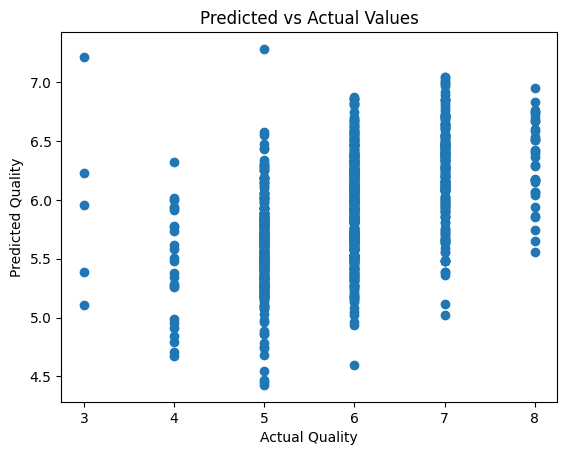

In [ ]:
import matplotlib.pyplot as plt

# Plot Predicted vs Actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted vs Actual Values')
plt.show()


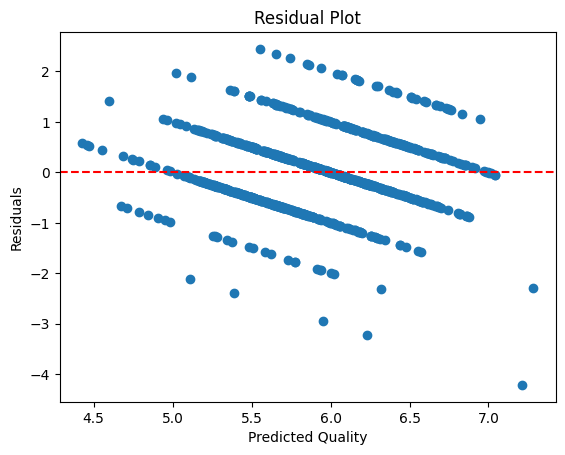

In [ ]:
# Plot Residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Quality')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
